### Wstęp do Uczenia Maszynowego 
##### Laboratorium 12

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

### Voting & Stacking

### Zadanie 0
---


Dla danych (X, y) korzystając z metody `StackingClassifier` i `VotingClassifier` zbuduj dwa pipeline, które będą zakończone komitetami klasyfikatorów, zbudowanych z 4 różnych algorytmów uczenia maszynowego.

a) Jaka jest różnica w jakości poszczególnych modeli, a całego stackingu i votingu?

b) Czy algorytmy mają podobny wkład w ostateczną predykcję czy jeden z algorytmów dominuje?


In [8]:
X = pd.read_csv("../lab08/X.csv")
y = pd.read_csv("../lab08/y.csv")

In [9]:
y.loc[y.income == '<=50K.'] = '<=50K'
y.loc[y.income == '>50K.'] = '>50K'

In [13]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))

])

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat_pipeline', cat_pipeline, make_column_selector(dtype_include=np.object_))
    ])

model_pipeline = Pipeline([('preprocessing', col_trans),
                           ...
                           ])

### $k$-średnich *($k$-means)*

###### $K$ - średnich jest prostym podejściem do podziału zbioru danych na $k$ odrębnych, nienakładających się skupień. Aby wykonać $k$ - średnich musimy najpierw określić żądaną liczbę skupień $k$; następnie algorytm algorytm $k$-średnich przypisze każdą obserwację do dokładnie jednego z $k$ skupień.


<img src="kmeans.png"  width="500"/>

###### *An Introduction to Statistical Learning with Applications in Python*


### Algorytm
1) *Ustalamy liczbę skupień*
2) *Ustalamy wstępne środki skupień*
3) *Obliczamy odległości obiektów (obserwacji) od środków skupień*
4) Przypisujemy obiekty do skupień
5) Ustalamy nowe środki skupień
6) Wykonujemy kroki 3), 4), 5) do czasu, aż warunek zatrzymania zostanie spełniony

<img src="centroids_iterations.webp"  width="600"/>

[*K-Means Clustering in Python: A Practical Guide*](https://realpython.com/k-means-clustering-python/)

### Dane

In [5]:
np.random.seed(0)
X = np.random.standard_normal((50, 2))
X[:25,0] += 3
X[:25,1] -= 4

<Axes: >

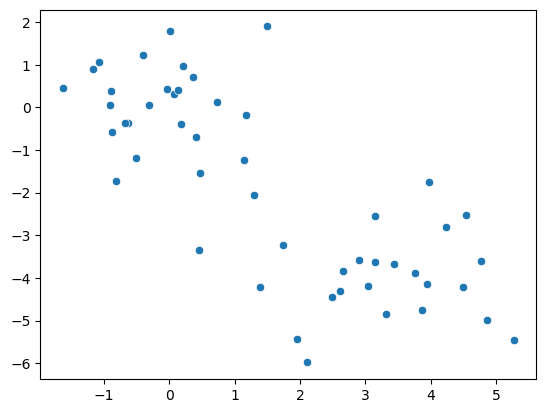

In [6]:
sns.scatterplot(x = X[:,0], y = X[:,1])

### Zadanie 1
---
Przygotuj model k-średnich dla liczby klastrów równej 2.
Użyj funkcji `KMeans()`. Przedstaw na wykresie przydział obserwacji do utworzonych skupień.

### Zadanie 2
---
Przygotuj model $k$-średnich dla k = 3. Narysuj wykres pokazujący przynależność obserwacji do utworzonych klastrów oraz zaznacz wyznaczone centroidy.

### Zadanie 3
---
Za co jest odpowiedzialny parametr `n_init`? Porównaj model dla `n_init = 1` oraz `n_init = 20` używając `.interia_`.


### Jak wybrać optymalne $k$?

### Zadanie 4
---
Rozważ $k$ z przedziału `range(1, 11)`, przyygotuj dla zadanego $k$ model i wylicz SSE. Przedstaw rezultaty na wykresie.